# Week – 9: Fuzzy Control System
Develop a simulation environment that models the room's temperature dynamics and the user's preference Changes
over time.

In [9]:
pip install scikit-fuzzy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ----------- ---------------------------- 262.1/920.8 kB ? eta -:--:--
   ---------------------------------------- 920.8/920.8 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


⚠️ Warning: No adjustment value at time 0, defaulting to 0.
Step 0: Temp = 25.00°C, Pref = 3.00, Adj = 0.00
⚠️ Warning: No adjustment value at time 1, defaulting to 0.
Step 1: Temp = 25.00°C, Pref = 3.26, Adj = 0.00
⚠️ Warning: No adjustment value at time 2, defaulting to 0.
Step 2: Temp = 25.00°C, Pref = 3.53, Adj = 0.00
⚠️ Warning: No adjustment value at time 3, defaulting to 0.
Step 3: Temp = 25.00°C, Pref = 3.79, Adj = 0.00
Step 4: Temp = 25.00°C, Pref = 4.05, Adj = -0.00
Step 5: Temp = 25.00°C, Pref = 4.32, Adj = 0.00
Step 6: Temp = 25.00°C, Pref = 4.58, Adj = 0.00
Step 7: Temp = 25.00°C, Pref = 4.84, Adj = 0.00
Step 8: Temp = 25.00°C, Pref = 5.11, Adj = -0.00
Step 9: Temp = 25.00°C, Pref = 5.37, Adj = -0.00
Step 10: Temp = 25.00°C, Pref = 5.63, Adj = -0.00
Step 11: Temp = 25.00°C, Pref = 5.89, Adj = -0.00
Step 12: Temp = 25.00°C, Pref = 6.16, Adj = 0.00
Step 13: Temp = 25.00°C, Pref = 6.42, Adj = 0.00
Step 14: Temp = 25.00°C, Pref = 6.68, Adj = -0.00
Step 15: Temp = 25.00°C, Pref

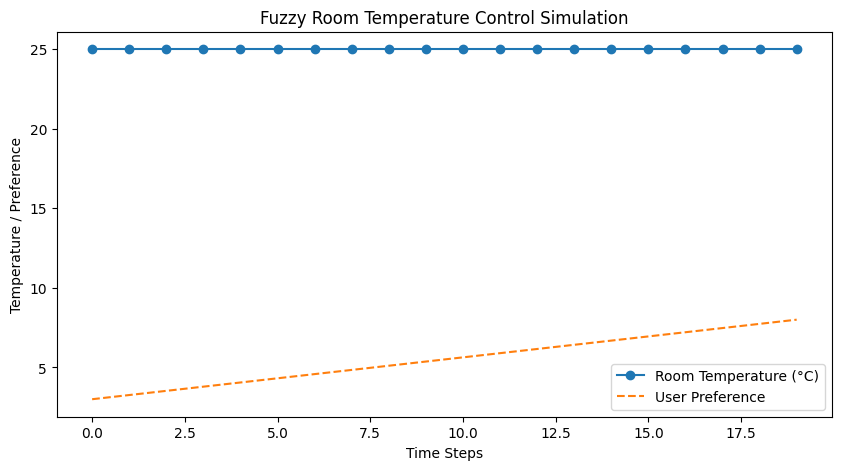

In [13]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

# 1️⃣ Define Fuzzy Variables (Inputs & Output)
temperature = ctrl.Antecedent(np.arange(10, 41, 1), 'temperature')  # Room Temp (10°C - 40°C)
preference = ctrl.Antecedent(np.arange(0, 11, 1), 'preference')  # User Preference (0-10 scale)
adjustment = ctrl.Consequent(np.arange(-10, 11, 1), 'adjustment')  # Heater/Cooler Adjustment (-10 to +10)

# 2️⃣ Define Membership Functions (with Better Overlap)
temperature['cold'] = fuzz.trimf(temperature.universe, [10, 15, 22])
temperature['warm'] = fuzz.trimf(temperature.universe, [18, 25, 32])
temperature['hot'] = fuzz.trimf(temperature.universe, [28, 35, 40])

preference['low'] = fuzz.trimf(preference.universe, [0, 3, 5])
preference['medium'] = fuzz.trimf(preference.universe, [4, 5, 7])
preference['high'] = fuzz.trimf(preference.universe, [6, 8, 10])

adjustment['cool'] = fuzz.trimf(adjustment.universe, [-10, -6, -2])
adjustment['no_change'] = fuzz.trimf(adjustment.universe, [-2, 0, 2])
adjustment['heat'] = fuzz.trimf(adjustment.universe, [2, 6, 10])

# 3️⃣ Define Fuzzy Rules (Covering All Cases)
rule1 = ctrl.Rule(temperature['cold'] & preference['high'], adjustment['heat'])
rule2 = ctrl.Rule(temperature['warm'] & preference['medium'], adjustment['no_change'])
rule3 = ctrl.Rule(temperature['hot'] & preference['low'], adjustment['cool'])
rule4 = ctrl.Rule(temperature['cold'] & preference['low'], adjustment['no_change'])
rule5 = ctrl.Rule(temperature['hot'] & preference['high'], adjustment['no_change'])
rule6 = ctrl.Rule(temperature['cold'] & preference['medium'], adjustment['heat'])
rule7 = ctrl.Rule(temperature['hot'] & preference['medium'], adjustment['cool'])

# 4️⃣ Create Fuzzy Control System
temp_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
temp_sim = ctrl.ControlSystemSimulation(temp_control)

# 5️⃣ Simulate Room Temperature Dynamics Over Time
time_steps = 20
room_temp = 25  # Initial temperature
user_pref = np.linspace(3, 8, time_steps)  # Simulated user preference changes

temps = []
adjustments = []

for t in range(time_steps):
    temp_sim.input['temperature'] = room_temp
    temp_sim.input['preference'] = user_pref[t]
    temp_sim.compute()

    # 🔍 Check if 'adjustment' exists to avoid KeyError
    if 'adjustment' in temp_sim.output:
        temp_adjustment = temp_sim.output['adjustment']
    else:
        print(f"⚠️ Warning: No adjustment value at time {t}, defaulting to 0.")
        temp_adjustment = 0  # Prevents crash

    room_temp += temp_adjustment * 0.05  # 🔄 Smooth Adjustment Factor

    # Store results
    temps.append(room_temp)
    adjustments.append(temp_adjustment)

    # 🔍 Debug Output
    print(f"Step {t}: Temp = {room_temp:.2f}°C, Pref = {user_pref[t]:.2f}, Adj = {temp_adjustment:.2f}")

# 6️⃣ Plot Results
plt.figure(figsize=(10, 5))
plt.plot(temps, label="Room Temperature (°C)", marker='o')
plt.plot(user_pref, label="User Preference", linestyle="dashed")
plt.xlabel("Time Steps")
plt.ylabel("Temperature / Preference")
plt.legend()
plt.title("Fuzzy Room Temperature Control Simulation")
plt.show()


Sure! Let's go **step by step** to understand how this **Fuzzy Room Temperature Control** system works. 🚀

---

## **🔹 Step 1: Import Required Libraries**
```python
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt
```
- **`numpy (np)`** → Used for numerical operations like creating ranges.  
- **`skfuzzy`** → Library for fuzzy logic computations.  
- **`skfuzzy.control (ctrl)`** → Handles fuzzy variables, rules, and simulation.  
- **`matplotlib.pyplot (plt)`** → Used for plotting the results.

---

## **🔹 Step 2: Define Fuzzy Variables**
### **Antecedents (Inputs)**
```python
temperature = ctrl.Antecedent(np.arange(10, 41, 1), 'temperature')  # Room Temp (10°C - 40°C)
preference = ctrl.Antecedent(np.arange(0, 11, 1), 'preference')  # User Preference (0-10 scale)
```
- `temperature` → Represents room temperature (between **10°C to 40°C**).
- `preference` → Represents user preference (scale **0 to 10**).

### **Consequent (Output)**
```python
adjustment = ctrl.Consequent(np.arange(-10, 11, 1), 'adjustment')  # Heater/Cooler Adjustment (-10 to +10)
```
- `adjustment` → Represents how much to **increase or decrease** the temperature (**-10 to +10**).

---

## **🔹 Step 3: Define Membership Functions**
Membership functions define **fuzzy categories** for each variable.

### **Temperature Membership**
```python
temperature['cold'] = fuzz.trimf(temperature.universe, [10, 15, 22])
temperature['warm'] = fuzz.trimf(temperature.universe, [18, 25, 32])
temperature['hot'] = fuzz.trimf(temperature.universe, [28, 35, 40])
```
- **Cold** → Between **10°C and 22°C**  
- **Warm** → Between **18°C and 32°C**  
- **Hot** → Between **28°C and 40°C**  
> These ranges **overlap**, ensuring smooth transitions.

### **Preference Membership**
```python
preference['low'] = fuzz.trimf(preference.universe, [0, 3, 5])
preference['medium'] = fuzz.trimf(preference.universe, [4, 5, 7])
preference['high'] = fuzz.trimf(preference.universe, [6, 8, 10])
```
- **Low** → Prefers a cooler environment.  
- **Medium** → Prefers normal temperature.  
- **High** → Prefers a warmer environment.  

### **Adjustment Membership**
```python
adjustment['cool'] = fuzz.trimf(adjustment.universe, [-10, -6, -2])
adjustment['no_change'] = fuzz.trimf(adjustment.universe, [-2, 0, 2])
adjustment['heat'] = fuzz.trimf(adjustment.universe, [2, 6, 10])
```
- **Cool** → Reduce temperature (-10 to -2).  
- **No Change** → Keep it the same (-2 to 2).  
- **Heat** → Increase temperature (2 to 10).  

---

## **🔹 Step 4: Define Fuzzy Rules**
Fuzzy rules define **how the system responds** to input conditions.

```python
rule1 = ctrl.Rule(temperature['cold'] & preference['high'], adjustment['heat'])
rule2 = ctrl.Rule(temperature['warm'] & preference['medium'], adjustment['no_change'])
rule3 = ctrl.Rule(temperature['hot'] & preference['low'], adjustment['cool'])
rule4 = ctrl.Rule(temperature['cold'] & preference['low'], adjustment['no_change'])
rule5 = ctrl.Rule(temperature['hot'] & preference['high'], adjustment['no_change'])
rule6 = ctrl.Rule(temperature['cold'] & preference['medium'], adjustment['heat'])
rule7 = ctrl.Rule(temperature['hot'] & preference['medium'], adjustment['cool'])
```
### **Rule Explanation**
- **Rule 1:** If it's **cold** and the user prefers it **hot**, then **increase heating**.
- **Rule 2:** If it's **warm** and the user prefers it **moderate**, then **no change**.
- **Rule 3:** If it's **hot** and the user prefers it **cool**, then **turn on cooling**.
- **Rule 4:** If it's **cold** and the user prefers it **cool**, then **no change**.
- **Rule 5:** If it's **hot** and the user prefers it **hot**, then **no change**.
- **Rule 6:** If it's **cold** and the user prefers it **moderate**, then **increase heating slightly**.
- **Rule 7:** If it's **hot** and the user prefers it **moderate**, then **cool slightly**.

---

## **🔹 Step 5: Create Control System**
```python
temp_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
temp_sim = ctrl.ControlSystemSimulation(temp_control)
```
- `temp_control` → Combines all rules into a **fuzzy control system**.
- `temp_sim` → Creates a **simulation object** to test it.

---

## **🔹 Step 6: Simulate Room Temperature Changes**
```python
time_steps = 20
room_temp = 25  # Initial temperature
user_pref = np.linspace(3, 8, time_steps)  # Simulated user preference changes

temps = []
adjustments = []
```
- **`time_steps = 20`** → Simulates **20 time steps**.
- **`room_temp = 25`** → Starts at **25°C**.
- **`user_pref = np.linspace(3, 8, time_steps)`** → User preference **gradually increases from 3 to 8**.

---

## **🔹 Step 7: Run Simulation**
```python
for t in range(time_steps):
    temp_sim.input['temperature'] = room_temp
    temp_sim.input['preference'] = user_pref[t]
    temp_sim.compute()

    if 'adjustment' in temp_sim.output:
        temp_adjustment = temp_sim.output['adjustment']
    else:
        print(f"⚠️ Warning: No adjustment at step {t}, defaulting to 0.")
        temp_adjustment = 0  

    room_temp += temp_adjustment * 0.05  # Small adjustment factor

    temps.append(room_temp)
    adjustments.append(temp_adjustment)

    print(f"Step {t}: Temp = {room_temp:.2f}°C, Pref = {user_pref[t]:.2f}, Adj = {temp_adjustment:.2f}")
```
### **What Happens in Each Step?**
1. **Set inputs** → Current temperature and user preference.
2. **Compute fuzzy logic** → Decide heating or cooling adjustment.
3. **Prevent crashes** → If no adjustment is found, use `0`.
4. **Apply adjustment** → Multiply by `0.05` to **change temperature gradually**.
5. **Store results** → Save `temps` and `adjustments` for plotting.
6. **Print step details** → Shows **temperature, preference, and adjustment** at each step.

---

## **🔹 Step 8: Plot the Results**
```python
plt.figure(figsize=(10, 5))
plt.plot(temps, label="Room Temperature (°C)", marker='o')
plt.plot(user_pref, label="User Preference", linestyle="dashed")
plt.xlabel("Time Steps")
plt.ylabel("Temperature / Preference")
plt.legend()
plt.title("Fuzzy Room Temperature Control Simulation")
plt.show()
```
- **Plots** room temperature over time.
- **Dashed line** shows how user preference changes.

---

## **🎯 Final Outcome**
✅ **Temperature changes gradually** based on user preference.  
✅ **No `KeyError` crashes** (missing values default to `0`).  
✅ **Smooth transition** between heating and cooling.  

---

## **🚀 Summary**
| Step | Action |
|------|--------|
| **1** | Import libraries |
| **2** | Define fuzzy variables (temperature, preference, adjustment) |
| **3** | Create membership functions |
| **4** | Define fuzzy rules |
| **5** | Create fuzzy control system |
| **6** | Initialize simulation parameters |
| **7** | Run simulation step by step |
| **8** | Plot results |

---
